# Udacity Deep Reinforcement Learning: Navigation

---

### 1. Start the Environment

In [1]:
!pip -q install ./python

Invalid requirement: './python'
It looks like a path. File './python' does not exist.


### 2. Loading all required libraries

In [2]:
from unityagents import UnityEnvironment
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import random
from collections import namedtuple, deque

import matplotlib.pyplot as plt
%matplotlib inline

### 3. Loading and initiating enviornment

In [3]:
# please do not modify the line below
env = UnityEnvironment(file_name="./Banana.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of actions
action_size = brain.vector_action_space_size
# print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
# print('States look like:', state)

state_size = len(state)
# print('States have length:', state_size)

### 4. Train the agent

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agent while it is training**, and you should set `train_mode=True` to restart the environment.

In [6]:
# Hyperparameters:

# Training hyperparameters
N_EPISODES=2000
MAX_T=1000
EPS_START=1.0
EPS_END=0.01
EPS_DECAY=0.995

# Neural Network hyperparameters
FC1_UNITS=64
FC2_UNITS=64

# Deep Q-Learning hyperparameters
BUFFER_SIZE = int(1e5)  # replay buffer size
BATCH_SIZE = 64         # minibatch size
GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR = 5e-4               # learning rate
UPDATE_EVERY = 4        # how often to update the network

# Average Reward Gain Target per 100 episodes
Target_Reward = 13.0

Episode 100	Average Score: 1.31
Episode 200	Average Score: 5.04
Episode 300	Average Score: 8.31
Episode 400	Average Score: 10.32
Episode 500	Average Score: 12.76
Episode 506	Average Score: 13.00
Environment solved in 406 episodes!	Average Score: 13.00


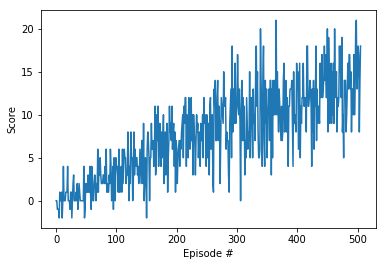

In [7]:
# from model import QNetwork
from train import Agent

agent = Agent(    
    state_size=state_size,
    action_size=action_size,
    seed=0,
    fc1_units=FC1_UNITS,
    fc2_units=FC2_UNITS,
    buffer_size=BUFFER_SIZE,
    batch_size=BATCH_SIZE,
    gamma=GAMMA,
    tau=TAU,
    lr=LR,
    update_every=UPDATE_EVERY)

def dqn(n_episodes=N_EPISODES, max_t=MAX_T, eps_start=EPS_START, eps_end=EPS_END, eps_decay=EPS_DECAY):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """     
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0] # get the current state
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name] # send the action to the environment
            next_state = env_info.vector_observations[0] # get the next state
            reward = env_info.rewards[0] # get the reward
            done = env_info.local_done[0] # see if episode has finished

            agent.step(state, action, reward, next_state, done)

            state = next_state
            score += reward

            if done:
                break
            
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=Target_Reward:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'model.pth')
            break
    return scores

scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()
fig.savefig('model.png')

In [8]:
env.close()